In [1]:
#librerie che mi servono
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importo il dataset
df = pd.read_csv('access_electricity.csv')

In [3]:
#esploro le prime 10 righe del dataframe
df.head(10)

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
5,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,35.821964263916,36.9904899597168,32,42,40.5206069946289,Africa
6,Antigua and Barbuda,ATG,Access to electricity (% of population),EG.ELC.ACCS.ZS,95.2546920776367,95.773551940918,96.2984161376953,96.8262939453125,97.3546676635742,North America
7,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,87.2882439402148,88.3897051476481,88.0767741380158,88.5179673938546,88.7686540243445,Asia
8,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.5844116210938,99.8371276855469,99.9592437744141,99.9952087402344,100,South America
9,Armenia,ARM,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.8788757324219,99.9540557861328,99.9889755249023,100,100,Asia


In [4]:
#esploro le ultime 10 righe
df.tail(10)

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
232,Uzbekistan,UZB,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.9999084472656,100,100,100,100,Asia
233,Vanuatu,VUT,Access to electricity (% of population),EG.ELC.ACCS.ZS,39.9828300476074,31.7,43.1033477783203,44.6696128845215,57.82,Oceania
234,"Venezuela, RB",VEN,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.0449676513672,99.1785507202148,99.3181457519531,99.4607391357422,99.6038360595703,South America
235,Vietnam,VNM,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,99.2,100,100,Asia
236,Virgin Islands (U.S.),VIR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,North America
237,West Bank and Gaza,PSE,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,99.9,100,100,Asia
238,World,WLD,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.0690998889319,85.1886892166901,85.7179827560055,87.0559229562313,87.3784431778704,NaN
239,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,65.9421005249023,75.6,66.1,70.2139053344727,71.6423492431641,Asia
240,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,24.8946666717529,25.4697017669678,27.9,31.1,27.2193374633789,Africa
241,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,36.7288780212402,37.0768127441406,32.3,33.7,38.1451377868652,Africa


In [5]:
#controllo il numero di righe e colonne
df.shape

(242, 10)

In [6]:
#prendo tutti i valori unici della colonna 'series name'
df['Series Name'].unique()

array(['Access to electricity (% of population)'], dtype=object)

In [7]:
#prendo tutti i valori unici della colonna 'series code'
df['Series Code'].unique()

array(['EG.ELC.ACCS.ZS'], dtype=object)

Il dataset mostra la percentuale della popolazione che dispone di accesso alla rete elettrica in ogni paese, per gli anni che vanno dal 2012 al 2016.

Appare evidente che il dataframe ricavato direttamente dal dataset risulti ancora poco pulito per i nostri scopi.

In [8]:
#elimino le colonne 'Series Name' e 'Series Code', totalmente inutili per i nostri scopi
#e ridondanti nel loro contenuto (sempre identico per ogni tupla).

df.drop(['Series Name', 'Series Code'], axis=1, inplace=True)

In [9]:
#rinomino le colonne degli anni con l'anno, rimuovendo caratteri superflui

for i in range(2012, 2017):
    df.rename(columns={f'{i} [YR{i}]': str(i)}, inplace=True)

In [10]:
#mi assicuro che non ci siano paesi ripetuti

df['Country Name'].nunique() == df.shape[0]

True

In [11]:
#esploro il tipo di dati
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  242 non-null    object
 1   Country Code  242 non-null    object
 2   2012          242 non-null    object
 3   2013          242 non-null    object
 4   2014          242 non-null    object
 5   2015          242 non-null    object
 6   2016          242 non-null    object
 7   Continent     228 non-null    object
dtypes: object(8)
memory usage: 15.3+ KB


None

Tutti i dati della tabella sono nel generico formato 'object'. Questo ci impedisce anche di sapere con esattezza dove e quanti sono i valori NULL, visto che anche una cella vuota, segnata con .., risulta comunque compatibile con l'attuale formato, nonostante sia chiaramente da intendersi come valore NULL (se ne scorge qualcuno già dal *head* del dataframe, in corrispondenza di American Samoa).

In [12]:
#sostituisco '..' con NaN nelle colonne degli anni
for year in range(2012, 2017):
    df[str(year)] = df[str(year)].replace('..', np.nan)

#converto le colonne degli anni in tipo numerico
for year in range(2012, 2017):
    df[str(year)] = pd.to_numeric(df[str(year)])

#verifico i tipi di dati aggiornati e i valori mancanti
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  242 non-null    object 
 1   Country Code  242 non-null    object 
 2   2012          240 non-null    float64
 3   2013          240 non-null    float64
 4   2014          240 non-null    float64
 5   2015          239 non-null    float64
 6   2016          239 non-null    float64
 7   Continent     228 non-null    object 
dtypes: float64(5), object(3)
memory usage: 15.3+ KB


None

In [13]:
#cerco celle con '..' anche nelle colonne 'Country Name', 'Country Code' e 'Continent'

for col in ['Country Name', 'Country Code', 'Continent']:
    if (df[col] == '..').any():
        print(f"La colonna '{col}' contiene '..'")
    else:
        print(f"La colonna '{col}' non contiene '..'")

La colonna 'Country Name' non contiene '..'
La colonna 'Country Code' non contiene '..'
La colonna 'Continent' non contiene '..'


Le colonne 'Country Name' e 'Country Code' sono a posto, ma la colonna 'Continent' contiene ancora valori nulli (NaN, non ..) da controllare.

In [14]:
#estrapolo la lista di paesi che hanno valore nullo nella colonna 'Continent'

countries_with_null_continent = df[df['Continent'].isnull()]['Country Name']
print("Paesi con valore nullo nella colonna 'Continent':")
for country in countries_with_null_continent:
    print(country)

Paesi con valore nullo nella colonna 'Continent':
Europe & Central Asia
Europe & Central Asia (excluding high income)
Heavily indebted poor countries (HIPC)
High income
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (excluding high income)
Middle income
OECD members
Upper middle income
World


Come era intuibile dalla presenza di 'World' nel *tail*, i valori nulli della colonna 'Continent' sono associati ad aggregati di paesi.

Procedo dunque a estrarre queste voci dal dataframe per portarle su un nuovo dataframe.

In [16]:
#creo un dataframe con gli aggregati di paesi

df_agg = df[df['Country Name'].isin(countries_with_null_continent)]
df_agg

,Country Name,Country Code,2012,2013,2014,2015,2016,Continent
69,Europe & Central Asia,ECS,99.977625,99.994686,99.995541,99.999199,99.999974,NaN
70,Europe & Central Asia (excluding high income),ECA,99.950380,99.988230,99.990136,99.998232,99.999943,NaN
92,Heavily indebted poor countries (HIPC),HPC,30.966883,31.500564,34.054916,34.460683,38.531412,NaN
93,High income,HIC,99.947335,99.950296,99.968816,99.968814,99.976739,NaN
121,Least developed countries: UN classification,LDC,36.389474,37.088844,38.673140,40.679391,44.777737,NaN
128,Low & middle income,LMY,82.062621,82.226440,82.877424,84.499446,84.901076,NaN
129,Low income,LIC,31.335590,32.018289,33.505003,34.392584,38.833719,NaN
130,Lower middle income,LMC,78.573993,78.856359,80.095757,83.516047,83.415248,NaN
145,Middle East & North Africa,MEA,96.919281,97.883508,96.885366,97.878592,98.031713,NaN
146,Middle East & North Africa (excluding high inc...,MNA,96.418615,97.535503,96.368223,97.523384,97.699807,NaN


In [17]:
#tolgo le voci degli aggregati di paesi dal df originale
#mi aspetto di arrivare a 228 righe

df = df[~df['Country Name'].isin(countries_with_null_continent)]
df.shape

(228, 8)

In [18]:
#visualizzo i valori unici nella colonna 'Country name' di df
display(df['Country Name'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'Egypt, Arab Rep.', 

Ci sono ancora aggregati di paesi che occorre spostare da df a df_agg.

In [19]:
other_aggregates = [
    'Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
    'Euro area', 'European Union', 'North America',
    'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
    'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)']

#aggiungo a df_agg i paesi di other_aggregates
df_agg = pd.concat([df_agg, df[df['Country Name'].isin(other_aggregates)]])

#rimuovo da df i paesi di other_aggregates
df = df[~df['Country Name'].isin(other_aggregates)]

In [20]:
#da df_agg posso eliminare la colonna 'Continent'

df_agg.drop('Continent', axis=1, inplace=True)

In [21]:
#in entrambi i dataframe, arrotondo i valori numerici a 2 cifre decimali

for df_name in [df, df_agg]:
    for year in range(2012, 2017):
        df_name.loc[:, str(year)] = df_name[str(year)].round(2)

Adesso il dataframe principale (coi paesi) appare così:

In [22]:
df.head(15)

,Country Name,Country Code,2012,2013,2014,2015,2016,Continent
0,Afghanistan,AFG,69.10,67.26,89.50,71.50,84.14,Asia
1,Albania,ALB,100.00,100.00,100.00,100.00,100.00,Europe
2,Algeria,DZA,98.76,99.13,99.23,99.34,99.44,Africa
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,Oceania
4,Andorra,AND,100.00,100.00,100.00,100.00,100.00,Europe
5,Angola,AGO,35.82,36.99,32.00,42.00,40.52,Africa
6,Antigua and Barbuda,ATG,95.25,95.77,96.30,96.83,97.35,North America
8,Argentina,ARG,99.58,99.84,99.96,100.00,100.00,South America
9,Armenia,ARM,99.88,99.95,99.99,100.00,100.00,Asia
10,Aruba,ABW,94.26,94.58,94.91,95.24,95.57,North America


Di seguito il dataframe per gli aggregati di paesi:

In [23]:
df_agg

,Country Name,Country Code,2012,2013,2014,2015,2016
69,Europe & Central Asia,ECS,99.98,99.99,100.00,100.00,100.00
70,Europe & Central Asia (excluding high income),ECA,99.95,99.99,99.99,100.00,100.00
92,Heavily indebted poor countries (HIPC),HPC,30.97,31.50,34.05,34.46,38.53
93,High income,HIC,99.95,99.95,99.97,99.97,99.98
121,Least developed countries: UN classification,LDC,36.39,37.09,38.67,40.68,44.78
128,Low & middle income,LMY,82.06,82.23,82.88,84.50,84.90
129,Low income,LIC,31.34,32.02,33.51,34.39,38.83
130,Lower middle income,LMC,78.57,78.86,80.10,83.52,83.42
145,Middle East & North Africa,MEA,96.92,97.88,96.89,97.88,98.03
146,Middle East & North Africa (excluding high inc...,MNA,96.42,97.54,96.37,97.52,97.70


Adesso ho dati puliti con cui lavorare.

***Si effettuino 4 selezioni dei dati motivate (commento per ciascuna), 2 delle quali usanto .loc[] e .iloc[].***

Mi concentro sui dati più recenti: uso .loc per selezionare soltanto i nomi dei paesi e i valori del 2016.

In [24]:
display(df.loc[:, ['Country Name', '2016']])

,Country Name,2016
0,Afghanistan,84.14
1,Albania,100.00
2,Algeria,99.44
3,American Samoa,NaN
4,Andorra,100.00
...,...,...
236,Virgin Islands (U.S.),100.00
237,West Bank and Gaza,100.00
239,"Yemen, Rep.",71.64
240,Zambia,27.22


Mi concentro sui dati più recenti (2016) e sui continenti.

In [25]:
#uso .iloc per selezionare le ultime due colonne
df2 = df.iloc[:, -2:]

#da qui posso raggruppare per continente facendo la media dei valori della colonna 2016
continent2016avg = df2.groupby('Continent')['2016'].mean()
display(continent2016avg)

,2016
Continent,
Africa,49.625370
Asia,92.876346
Europe,99.439400
North America,95.367333
Oceania,88.255294
South America,96.634615


In [26]:
#seleziono soltanto i paesi asiatici

display(df[df['Continent'] == 'Asia'])

,Country Name,Country Code,2012,2013,2014,2015,2016,Continent
0,Afghanistan,AFG,69.10,67.26,89.50,71.50,84.14,Asia
9,Armenia,ARM,99.88,99.95,99.99,100.00,100.00,Asia
13,Azerbaijan,AZE,100.00,100.00,100.00,100.00,100.00,Asia
15,Bahrain,BHR,100.00,100.00,100.00,100.00,100.00,Asia
16,Bangladesh,BGD,60.88,61.50,62.40,68.20,75.92,Asia
23,Bhutan,BTN,91.50,92.40,96.91,98.42,100.00,Asia
29,Brunei Darussalam,BRN,100.00,100.00,100.00,100.00,100.00,Asia
34,Cambodia,KHM,40.96,43.16,56.10,47.57,49.77,Asia
42,China,CHN,99.92,99.98,100.00,100.00,100.00,Asia
52,Cyprus,CYP,100.00,100.00,100.00,100.00,100.00,Asia


Seleziono soltanto i paesi che hanno un accesso all'elettricità nel 2016 inferiore a 70%, in modo da poter ragionare su un nuovo dataframe dei paesi con basso accesso alla rete elettrica.

In [27]:
df_low_access = df[df['2016'] < 70]
display(df_low_access)

#in df_low_access, posso contare quante volte ogni continente compare nei paesi
display(df_low_access['Continent'].value_counts())

,Country Name,Country Code,2012,2013,2014,2015,2016,Continent
5,Angola,AGO,35.82,36.99,32.00,42.00,40.52,Africa
21,Benin,BEN,38.40,37.30,34.10,40.03,41.40,Africa
26,Botswana,BWA,52.06,54.21,56.37,58.53,60.69,Africa
31,Burkina Faso,BFA,16.40,17.08,19.20,18.47,19.16,Africa
32,Burundi,BDI,6.50,6.58,7.00,7.25,7.59,Africa
34,Cambodia,KHM,40.96,43.16,56.10,47.57,49.77,Asia
35,Cameroon,CMR,55.25,56.45,56.80,58.87,60.07,Africa
38,Central African Republic,CAF,11.60,12.19,12.78,13.38,13.99,Africa
39,Chad,TCD,7.07,7.50,7.94,7.70,8.83,Africa
45,"Congo, Dem. Rep.",COD,15.40,14.97,13.50,16.42,17.15,Africa


,count
Continent,
Africa,42
Asia,4
Oceania,3
North America,1


L'Africa è protagonista del dataframe dei paesi con basso accesso alla rete elettrica.

*Ho effettuato 4 selezioni motivate.*

***Si effettuino 2 riodinamenti (1 ascendente e 1 discendente) di due variabili a scelta motivate
(commento per ciascuno).***

Dal momento che i nomi dei paesi sono già ordinati nell'unica maniera sensata possibile (alfabetica), effettuo i due ordinamenti su una variabile numerica (dati del 2016) e sull'unica altra variabile non numerica su cui potrebbe aver senso effettuare un ordinamento (il continente).

Nel primo caso mostro i paesi in ordine per accesso alla rete elettrica (dal più prospero al meno elettrificato), nel secondo semplicemente visualizzo la tabella "sezionata" per continente.

In [28]:
#ordine discendente per i dati del 2016.

display(df.sort_values(by='2016', ascending=False))

,Country Name,Country Code,2012,2013,2014,2015,2016,Continent
1,Albania,ALB,100.00,100.00,100.00,100.00,100.00,Europe
4,Andorra,AND,100.00,100.00,100.00,100.00,100.00,Europe
8,Argentina,ARG,99.58,99.84,99.96,100.00,100.00,South America
9,Armenia,ARM,99.88,99.95,99.99,100.00,100.00,Asia
14,"Bahamas, The",BHS,99.96,99.99,100.00,100.00,100.00,North America
...,...,...,...,...,...,...,...,...
199,South Sudan,SSD,4.91,5.92,6.92,7.94,8.95,Africa
39,Chad,TCD,7.07,7.50,7.94,7.70,8.83,Africa
32,Burundi,BDI,6.50,6.58,7.00,7.25,7.59,Africa
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,Oceania


In [29]:
#ordine ascendente per il nome del continente.

display(df.sort_values(by='Continent'))

,Country Name,Country Code,2012,2013,2014,2015,2016,Continent
241,Zimbabwe,ZWE,36.73,37.08,32.30,33.70,38.15,Africa
38,Central African Republic,CAF,11.60,12.19,12.78,13.38,13.99,Africa
39,Chad,TCD,7.07,7.50,7.94,7.70,8.83,Africa
44,Comoros,COM,69.30,70.46,72.92,75.38,77.84,Africa
45,"Congo, Dem. Rep.",COD,15.40,14.97,13.50,16.42,17.15,Africa
...,...,...,...,...,...,...,...,...
41,Chile,CHL,99.86,99.60,100.00,99.71,100.00,South America
173,Paraguay,PRY,97.84,99.02,99.00,99.33,98.40,South America
43,Colombia,COL,97.03,97.78,97.79,98.19,99.00,South America
8,Argentina,ARG,99.58,99.84,99.96,100.00,100.00,South America


*Ho effettuato 2 ordinamenti.*

***Si generi 1 nuova colonna creata usando apply e lambda (commento).***

Creo una colonna che individui per ogni paese e per ogni aggregato, la variazione percentuale fra l'accesso all'elettricità nel 2012 (prima misurazione disponibile) e quello nel 2016 (ultima).

Cerco dunque di individuare una misura di cambiamento nella situazione osservata.

In [30]:
df['Change (2012-2016)'] = df.apply(
    lambda row: ((row['2016'] - row['2012']) / row['2012']) * 100 if pd.notna(row['2012']) and row['2012'] != 0 and pd.notna(row['2016']) else np.nan,
    axis=1
).round(2)

display(df[['Country Name', '2012', '2016', 'Change (2012-2016)']].head(20))

,Country Name,2012,2016,Change (2012-2016)
0,Afghanistan,69.10,84.14,21.77
1,Albania,100.00,100.00,0.00
2,Algeria,98.76,99.44,0.69
3,American Samoa,NaN,NaN,NaN
4,Andorra,100.00,100.00,0.00
5,Angola,35.82,40.52,13.12
6,Antigua and Barbuda,95.25,97.35,2.20
8,Argentina,99.58,100.00,0.42
9,Armenia,99.88,100.00,0.12
10,Aruba,94.26,95.57,1.39


In [31]:
df_agg['Change (2012-2016)'] = df_agg.apply(
    lambda row: ((row['2016'] - row['2012']) / row['2012']) * 100 if pd.notna(row['2012']) and row['2012'] != 0 and pd.notna(row['2016']) else np.nan,
    axis=1
).round(2)

display(df_agg[['Country Name', '2012', '2016', 'Change (2012-2016)']])

,Country Name,2012,2016,Change (2012-2016)
69,Europe & Central Asia,99.98,100.00,0.02
70,Europe & Central Asia (excluding high income),99.95,100.00,0.05
92,Heavily indebted poor countries (HIPC),30.97,38.53,24.41
93,High income,99.95,99.98,0.03
121,Least developed countries: UN classification,36.39,44.78,23.06
128,Low & middle income,82.06,84.90,3.46
129,Low income,31.34,38.83,23.90
130,Lower middle income,78.57,83.42,6.17
145,Middle East & North Africa,96.92,98.03,1.15
146,Middle East & North Africa (excluding high inc...,96.42,97.70,1.33


Ho creato una nuova colonna usando apply e lambda.

***Si elaborino 5 grafici comprensivi di titolo, labels e interpretazione (commento per ciascuno) di cui
almeno 1 boxplot, 1 istogramma e 1 scatterplot usando sia Matplotlib che Seaborn.***


📈 **Primo grafico**

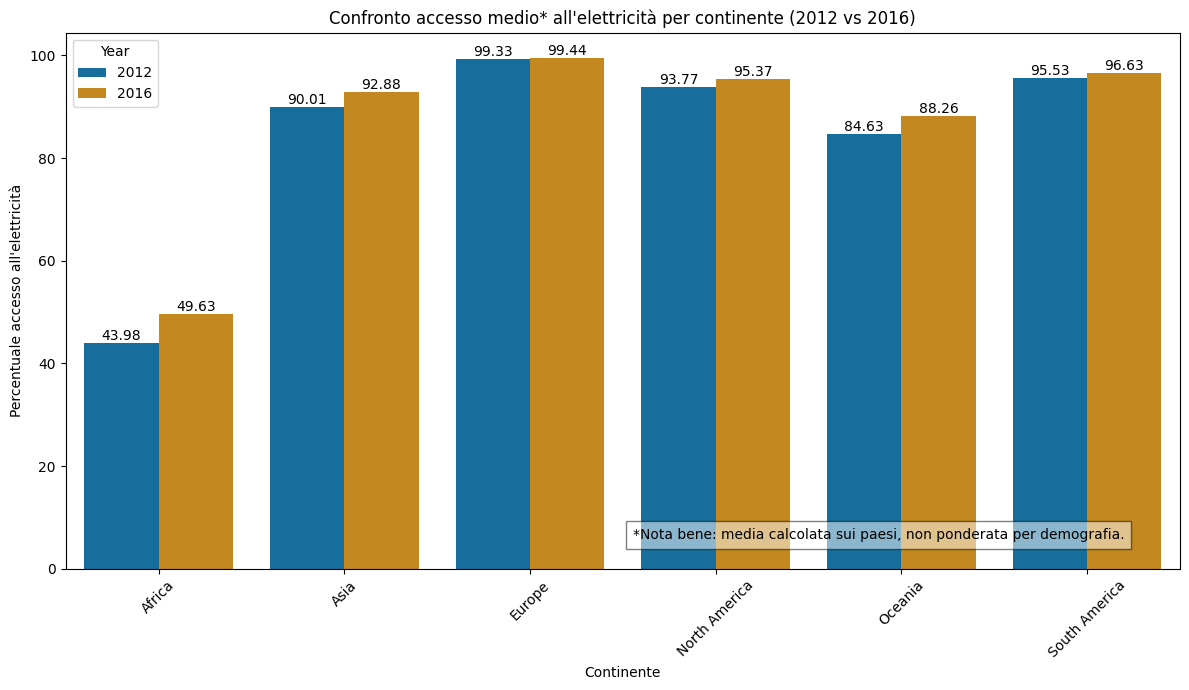

In [32]:
#calcolo la media dell'accesso all'elettricità per continente nel 2012
continent2012avg = df.groupby('Continent')['2012'].mean()

#combino i dati del 2012 e 2016 in un unico dataframe per il grafico a barre raggruppate
avg_access_by_year = pd.DataFrame({
    '2012': continent2012avg,
    '2016': continent2016avg
}).reset_index()

#converto il dataframe a un formato "long" adatto a seaborn
avg_access_melted = avg_access_by_year.melt('Continent', var_name='Year', value_name='Average Access')

#creo il grafico a barre raggruppate
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Continent', y='Average Access', hue='Year', data=avg_access_melted, palette='colorblind')
plt.title('Confronto accesso medio* all\'elettricità per continente (2012 vs 2016)')
plt.xlabel('Continente')
plt.ylabel('Percentuale accesso all\'elettricità')
plt.xticks(rotation=45)
plt.tight_layout()

#aggiungo i valori numerici in cima alle barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

#aggiungo una casella di testo
plt.text(0.95, 0.05, '*Nota bene: media calcolata sui paesi, non ponderata per demografia.',
         fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5},
         transform=ax.transAxes, ha='right', va='bottom')


plt.show()

In tutti i continenti l'accesso all'elettricità sembra migliorato dal 2012 al 2016, anche se la media andrebbe ponderata sulla demografia dei paesi per avere riscontri precisi.

Dall'istogramma appare chiaro come l'unico continente che si distingue sia l'Africa, dove l'accesso all'elettricità fra il 2012 e il 2016 era significativamente minore che altrove.

--------------------------

In [33]:
#troviamo i 10 paesi con la maggiore variazione fra l'accesso del 2012 e quello del 2016

top_10_growth = df.sort_values(by='Change (2012-2016)', ascending=False).head(10)
countries_list = top_10_growth['Country Name'].tolist()

#visualizza la lista
display(countries_list)

['Liberia',
 'Tanzania',
 'Kenya',
 'Rwanda',
 'South Sudan',
 'Uganda',
 'Ethiopia',
 'Malawi',
 'Vanuatu',
 'Mali']

📈 **Secondo grafico**

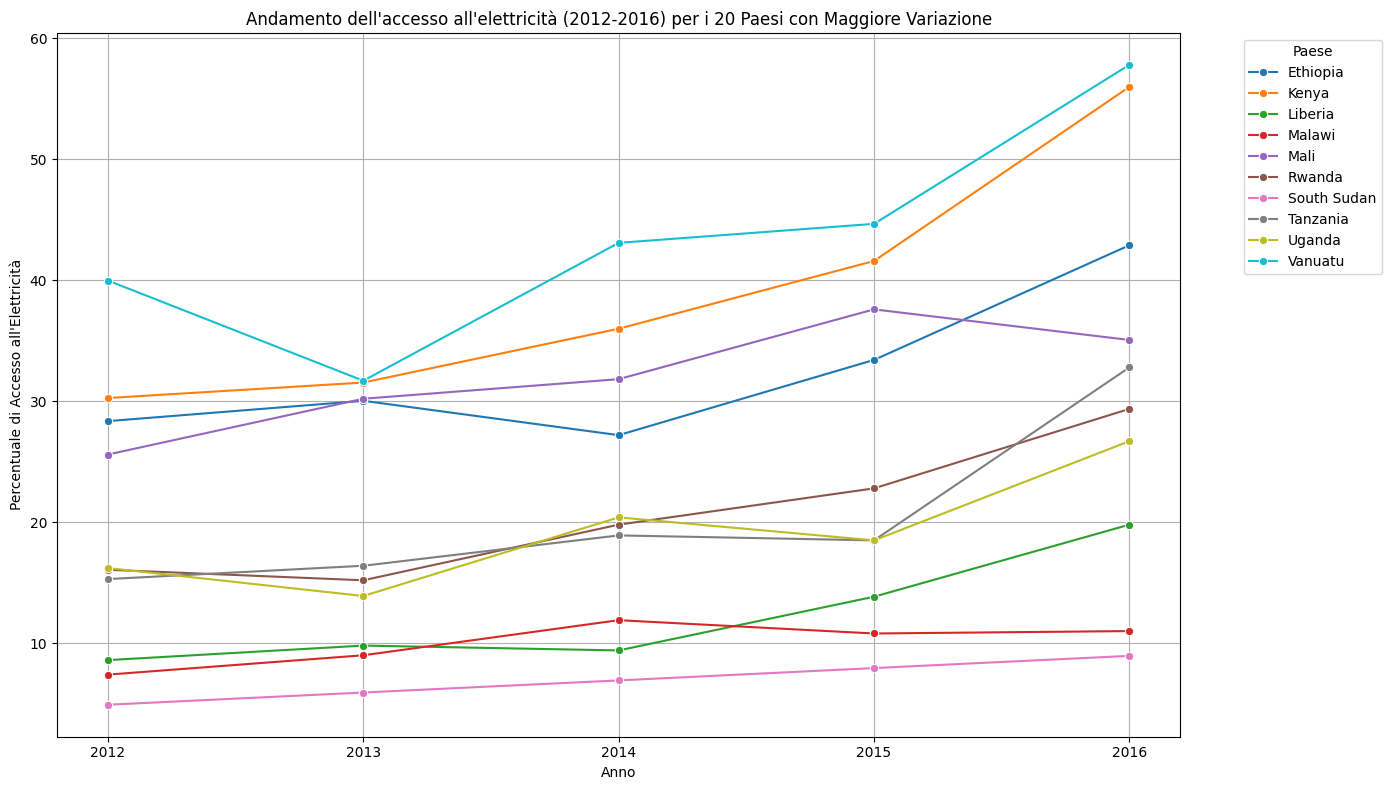

In [34]:
#filtra il dataframe per includere solo i paesi nella lista top_10_growth
df_top_growth = df[df['Country Name'].isin(countries_list)].copy()

#rimodella il dataframe da formato "wide" a "long" per il grafico a linee
df_top_growth_melted = df_top_growth.melt(
    id_vars=['Country Name'],
    value_vars=[str(year) for year in range(2012, 2017)],
    var_name='Year',
    value_name='Access to Electricity'
)

#converto la colonna 'Year' in numerico per un corretto ordinamento sull'asse x
df_top_growth_melted['Year'] = pd.to_numeric(df_top_growth_melted['Year'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_growth_melted, x='Year', y='Access to Electricity', hue='Country Name', marker='o')
plt.title('Andamento dell\'accesso all\'elettricità (2012-2016) per i 20 Paesi con Maggiore Variazione')
plt.xlabel('Anno')
plt.ylabel('Percentuale di Accesso all\'Elettricità')
plt.xticks(range(2012, 2017))
plt.grid(True)
plt.legend(title='Paese', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Si osserva che 9 paesi su 10 di quelli che hanno avuto la maggiore crescita di accesso all'elettricità fra il 2012 e il 2016 sono africani. In generale, in questi paesi si osserva un trend piuttosto rapido e abbastanza uniforme fra i vari paesi, nonostante punti di partenza assai diversi (meno del 10% per Liberia, Malawi e Sud Sudan, oltre il 30 per Kenya e Vanuatu).

-----------------------------------------

In [35]:
#integriamo i dati con un altro dataset per compiere analisi più profonde

df_happy = pd.read_csv('/content/happiness.csv')

In [36]:
df_happy.head(10)

,Country name,Continent,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,Asia,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,Asia,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,Asia,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,Asia,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,Asia,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,Asia,2013,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,Asia,2014,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,Asia,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,Asia,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,Asia,2017,2.661718,7.629684,0.490880,53.250000,0.427011,-0.116068,0.954393,0.435270,0.371326,0.261179


Cerco di integrare i due dataset in maniera sensata.

In [37]:
#elimino da df_happy tutti i dati relativi ad anni diversi da 2012,...,2016

df_happy_filtered = df_happy[(df_happy['year'] >= 2012) & (df_happy['year'] <= 2016)].copy()
display(df_happy_filtered.head(10))

,Country name,Continent,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
4,Afghanistan,Asia,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,Asia,2013,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,Asia,2014,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,Asia,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,Asia,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990
17,Albania,Europe,2012,5.510124,9.326163,0.784502,68.160004,0.601512,-0.168579,0.847675,0.553473,0.271393,0.364894
18,Albania,Europe,2013,4.550648,9.337966,0.759477,68.440002,0.631830,-0.126938,0.862905,0.540751,0.338379,0.338095
19,Albania,Europe,2014,4.813763,9.357625,0.625587,68.720001,0.734648,-0.024412,0.882704,0.572945,0.334543,0.498786
20,Albania,Europe,2015,4.606651,9.382482,0.639356,69.000000,0.703851,-0.080609,0.884793,0.579072,0.350427,0.506978
21,Albania,Europe,2016,4.511101,9.416693,0.638411,69.025002,0.729819,-0.016784,0.901071,0.567080,0.321706,0.400910


In [38]:
#tengo soltanto le colonne 'Country name', 'Log GDP per capita',
#'Healthy life expectancy at birth', 'Freedom to make life choices'

keep = ['Country name', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Freedom to make life choices']
for j in df_happy_filtered.columns:
    if j not in keep:
        df_happy_filtered.drop(j, axis=1, inplace=True)


df_happy_filtered.head(10)

,Country name,Log GDP per capita,Healthy life expectancy at birth,Freedom to make life choices
4,Afghanistan,7.637953,51.700001,0.530935
5,Afghanistan,7.657503,52.000000,0.577955
6,Afghanistan,7.650827,52.299999,0.508514
7,Afghanistan,7.634466,52.599998,0.388928
8,Afghanistan,7.629037,52.924999,0.522566
17,Albania,9.326163,68.160004,0.601512
18,Albania,9.337966,68.440002,0.631830
19,Albania,9.357625,68.720001,0.734648
20,Albania,9.382482,69.000000,0.703851
21,Albania,9.416693,69.025002,0.729819


In [39]:
#converto il valore per il gpd per capita su una scala lineare anziché logaritmica
#se NaN, restituisco NaN

df_happy_filtered['relative GDP per capita'] = df_happy_filtered['Log GDP per capita'].apply(lambda x: np.exp(x) if pd.notna(x) else np.nan)

In [40]:
#raggruppo per paese facendo la media dei dati per ogni colonna
#as_index=False per continuare a poter accedere normalmente in seguito alla colonna 'country name'
df_happy_filtered = df_happy_filtered.groupby('Country name', as_index=False).mean()

#elimino la colonna Log GDP per capita
df_happy_filtered.drop('Log GDP per capita', axis=1, inplace=True)

#arrotondo alla prima cigra decimale l'aspettativa di vita
df_happy_filtered['Healthy life expectancy at birth'] = df_happy_filtered['Healthy life expectancy at birth'].round(1)

#arrotondo alla terza cifra decimale e moltiplico per 10 i valori di Freedom to make life choices
df_happy_filtered['Freedom to make life choices'] = (df_happy_filtered['Freedom to make life choices'].round(3)*10)

#arrontondo all'intero più vicino il relative GDp per capita
df_happy_filtered['relative GDP per capita'] = df_happy_filtered['relative GDP per capita'].round()

Adesso il dataframe del csv "happiness" appare così:

In [41]:
display(df_happy_filtered.head(20))
display(df_happy_filtered.shape)

,Country name,Healthy life expectancy at birth,Freedom to make life choices,relative GDP per capita
0,Afghanistan,52.3,5.06,2084.0
1,Albania,68.7,6.80,11669.0
2,Algeria,65.9,5.87,11524.0
3,Angola,52.5,4.13,8139.0
4,Argentina,66.8,7.92,23843.0
5,Armenia,65.8,5.35,10947.0
6,Australia,70.5,9.27,47203.0
7,Austria,70.3,9.03,53090.0
8,Azerbaijan,62.8,6.96,14526.0
9,Bahrain,65.9,8.07,47243.0


(159, 4)

Si osservi che i valori "Healthy life expectancy at birth" (aspettativa di vita alla nascita), "Freedom to make life choices" (libertà nelle scelte di vita) e "relative GDP per capita" (pil pro capite relativo agli altri paesi) sono medie degli anni dal 2012 al 2016.

In [42]:
#confronto fra i due df sui nomi dei paesi
set_happy = set(df_happy_filtered['Country name'])
set_all = set(df['Country Name'])

common_countries = set_happy.intersection(set_all)
only_in_df = set_all - set_happy
only_in_happy = set_happy - set_all

def print_list_in_rows(country_list, per_row=3):
    country_list = sorted(country_list)
    for i in range(0, len(country_list), per_row):
        print(", ".join(country_list[i:i+per_row]))
    print()

print("Ecco i paesi presenti con lo stesso nome in entrambi i df:\n")
print_list_in_rows(common_countries)

print("Ecco i paesi di df che non hanno riscontro in df_happy_filtered:\n")
print_list_in_rows(only_in_df)

print("Ecco i paesi di df_happy_filtered che non hanno riscontro in df:\n")
print_list_in_rows(only_in_happy)



Ecco i paesi presenti con lo stesso nome in entrambi i df:

Afghanistan, Albania, Algeria
Angola, Argentina, Armenia
Australia, Austria, Azerbaijan
Bahrain, Bangladesh, Belarus
Belgium, Belize, Benin
Bhutan, Bolivia, Bosnia and Herzegovina
Botswana, Brazil, Bulgaria
Burkina Faso, Burundi, Cambodia
Cameroon, Canada, Central African Republic
Chad, Chile, China
Colombia, Comoros, Costa Rica
Croatia, Cyprus, Denmark
Dominican Republic, Ecuador, El Salvador
Estonia, Ethiopia, Finland
France, Gabon, Georgia
Germany, Ghana, Greece
Guatemala, Guinea, Haiti
Honduras, Hungary, Iceland
India, Indonesia, Iraq
Ireland, Israel, Italy
Jamaica, Japan, Jordan
Kazakhstan, Kenya, Kosovo
Kuwait, Latvia, Lebanon
Lesotho, Liberia, Libya
Lithuania, Luxembourg, Madagascar
Malawi, Malaysia, Mali
Malta, Mauritania, Mauritius
Mexico, Moldova, Mongolia
Montenegro, Morocco, Mozambique
Myanmar, Namibia, Nepal
Netherlands, New Zealand, Nicaragua
Niger, Nigeria, Norway
Pakistan, Panama, Paraguay
Peru, Philippines, Po

Adesso so esattamente quali nomi di df modificare per farli coincidere con quelli di df_happy_filtered.

Decido di tenere prevalentemente i nomi di df_happy_filtered in quanto più chiari.

In [43]:
df.loc[df['Country Name'] == 'Congo, Dem. Rep.', 'Country Name'] = 'Congo Dem. Rep.'
df.loc[df['Country Name'] == 'Congo, Rep.', 'Country Name'] = 'Congo'
df_happy_filtered.loc[df_happy_filtered['Country name'] == 'Czechia', 'Country name'] = 'Czech Republic'
df.loc[df['Country Name'] == 'Egypt, Arab Rep.', 'Country Name'] = 'Egypt'
df_happy_filtered.loc[df_happy_filtered['Country name'] == 'Hong Kong S.A.R. of China', 'Country name'] = 'Hong Kong'
df.loc[df['Country Name'] == 'Hong Kong SAR.', 'Country Name'] = 'Hong Kong'
df.loc[df['Country Name'] == 'Iran, Islamic Rep.', 'Country Name'] = 'Iran'
df.loc[df['Country Name'] == "Cote d'Ivoire", 'Country Name'] = 'Ivory Coast'
df.loc[df['Country Name'] == 'Kyrgyz Republic', 'Country Name'] = 'Kyrgyzstan'
df.loc[df['Country Name'] == 'Lao PDR', 'Country Name'] = 'Laos'
df_happy_filtered.loc[df_happy_filtered['Country name'] == 'North Macedonia', 'Country name'] = 'Macedonia'
df.loc[df['Country Name'] == 'West Bank and Gaza', 'Country Name'] = 'Palestine'
df_happy_filtered.loc[df_happy_filtered['Country name'] == 'Palestinian Territories', 'Country name'] = 'Palestine'
df.loc[df['Country Name'] == 'Russian Federation', 'Country Name'] = 'Russia'
df.loc[df['Country Name'] == 'Slovak Republic', 'Country Name'] = 'Slovakia'
df.loc[df['Country Name'] == 'Korea, Rep.', 'Country Name'] = 'South Korea'
df.loc[df['Country Name'] == 'Syrian Arab Republic', 'Country Name'] = 'Syria'
df.loc[df['Country Name'] == 'Venezuela, RB', 'Country Name'] = 'Venezuela'
df.loc[df['Country Name'] == 'Yemen, Rep.', 'Country Name'] = 'Yemen'

In [44]:
#unisco i dataframe in una left join fra df e df_happy_filtered

merged_df = pd.merge(df, df_happy_filtered, left_on='Country Name', right_on='Country name', how='left')

display(merged_df.head(10))
display(merged_df.info())

,Country Name,Country Code,2012,2013,2014,2015,2016,Continent,Change (2012-2016),Country name,Healthy life expectancy at birth,Freedom to make life choices,relative GDP per capita
0,Afghanistan,AFG,69.10,67.26,89.50,71.50,84.14,Asia,21.77,Afghanistan,52.3,5.06,2084.0
1,Albania,ALB,100.00,100.00,100.00,100.00,100.00,Europe,0.00,Albania,68.7,6.80,11669.0
2,Algeria,DZA,98.76,99.13,99.23,99.34,99.44,Africa,0.69,Algeria,65.9,5.87,11524.0
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,Oceania,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,100.00,100.00,100.00,100.00,100.00,Europe,0.00,NaN,NaN,NaN,NaN
5,Angola,AGO,35.82,36.99,32.00,42.00,40.52,Africa,13.12,Angola,52.5,4.13,8139.0
6,Antigua and Barbuda,ATG,95.25,95.77,96.30,96.83,97.35,North America,2.20,NaN,NaN,NaN,NaN
7,Argentina,ARG,99.58,99.84,99.96,100.00,100.00,South America,0.42,Argentina,66.8,7.92,23843.0
8,Armenia,ARM,99.88,99.95,99.99,100.00,100.00,Asia,0.12,Armenia,65.8,5.35,10947.0
9,Aruba,ABW,94.26,94.58,94.91,95.24,95.57,North America,1.39,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country Name                      218 non-null    object 
 1   Country Code                      218 non-null    object 
 2   2012                              216 non-null    float64
 3   2013                              216 non-null    float64
 4   2014                              216 non-null    float64
 5   2015                              216 non-null    float64
 6   2016                              216 non-null    float64
 7   Continent                         218 non-null    object 
 8   Change (2012-2016)                216 non-null    float64
 9   Country name                      152 non-null    object 
 10  Healthy life expectancy at birth  150 non-null    float64
 11  Freedom to make life choices      151 non-null    float64
 12  relative

None

Ora ho un dataframe più completo su cui indagare.

----------------------------------

📈 **Terzo grafico**

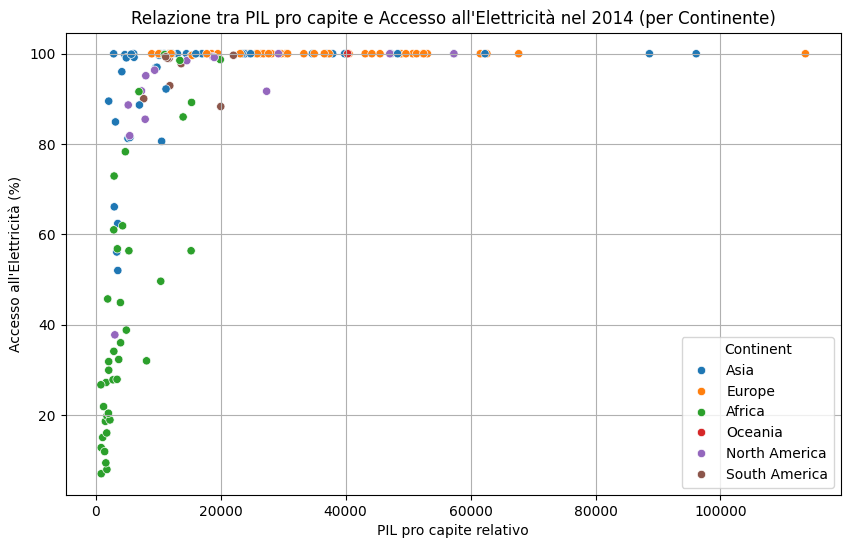

In [45]:
#scatterplot fra relative GDP per capita e access to electricity (2014)
# Coloro i punti secondo il continente

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='relative GDP per capita', y='2014', hue='Continent')
plt.title('Relazione tra PIL pro capite e Accesso all\'Elettricità nel 2014 (per Continente)')
plt.xlabel('PIL pro capite relativo')
plt.ylabel('Accesso all\'Elettricità (%)')
plt.grid(True)
plt.show()

Si osserva immediatamente che i paesi con basso accesso all'elettricità sono tutti nella fascia più bassa di pil pro capite, e per la maggior parte africani.

--------------------------------------

📈 **Quarto grafico**

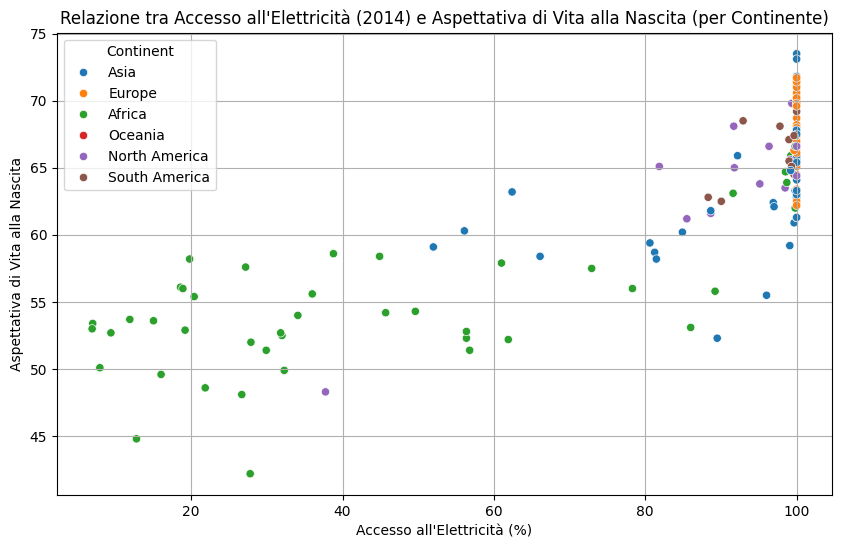

In [46]:
# Scatterplot tra Accesso all'elettricità (2014) e Healthy life expectancy at birth, colorato per continente

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='2014', y='Healthy life expectancy at birth', hue='Continent')
plt.title('Relazione tra Accesso all\'Elettricità (2014) e Aspettativa di Vita alla Nascita (per Continente)')
plt.xlabel('Accesso all\'Elettricità (%)')
plt.ylabel('Aspettativa di Vita alla Nascita')
plt.grid(True)
plt.show()

Questo scatterplot suggerisce che l'accesso all'elettricità possa essere un requisito per aumentare l'aspettativa di vita sana di una comunità.

Ulteriori indagini potrebbe collegare l'accesso ad una rete elettrica di qualità con la capacità sistemica di offrire cure mediche.

Si osserva comunque che nei paesi che si accalcano lungo la verticale a destra (100% di accesso all'elettricità) l'aspettativa di vita sana media è ancora piuttosto varia: come prevedibile, questa variabile dipende anche da molti altri fattori.

----------------------------------------

📈 **Quinto grafico**

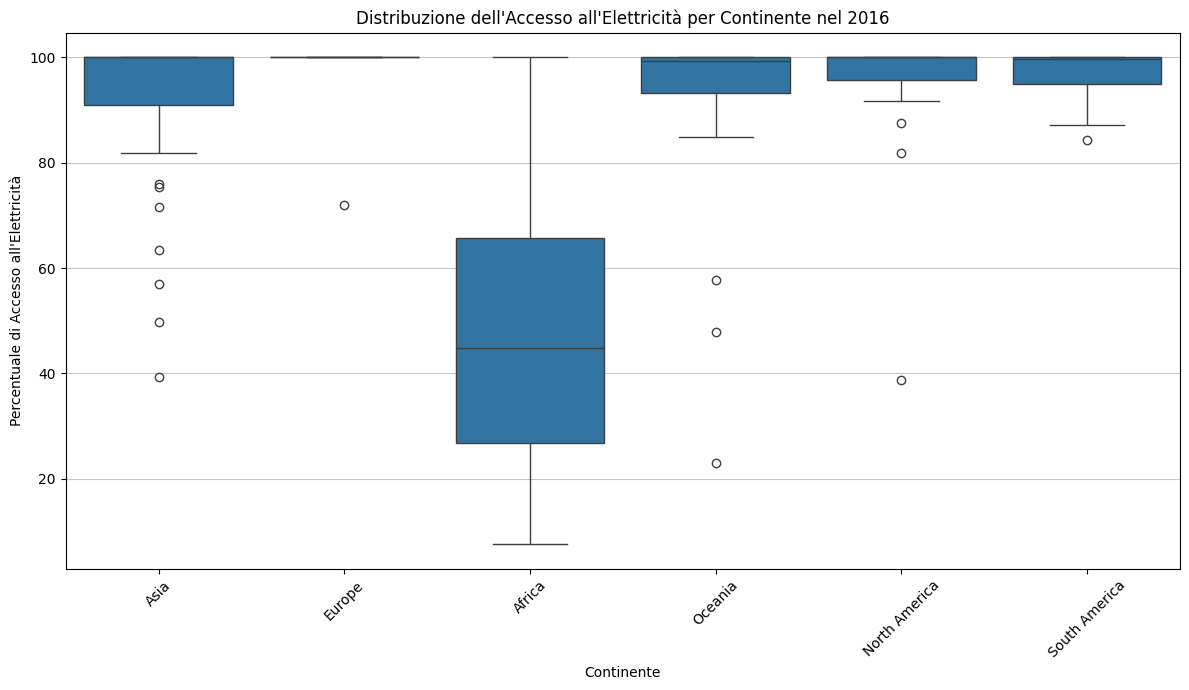

In [49]:
#boxplot per la distribuzione dell'accesso all'elettricità per continente nel 2016

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Continent', y='2016')
plt.title('Distribuzione dell\'Accesso all\'Elettricità per Continente nel 2016')
plt.xlabel('Continente')
plt.ylabel('Percentuale di Accesso all\'Elettricità')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

I boxplot mostrano ciò che sembrava emergere anche dalle precedenti analisi: l'Africa è un territorio sicuramente più difficile, l'Asia più sfaccettato (molti outliers) e l'Europa omogeneo.

-------------------------------------------

📈 **Sesto grafico**

/tmp/ipython-input-1363037519.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_per_bin = merged_df.groupby('Access_Bin')['relative GDP per capita'].mean().reset_index()


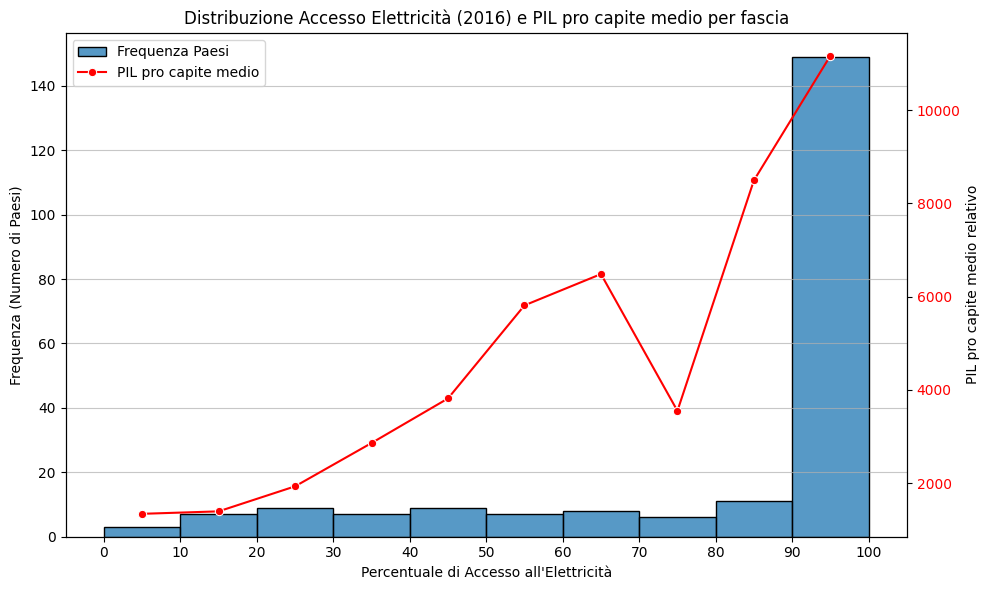

In [48]:
#istogramma della frequenza dell'accesso all'elettricità nei vari paesi (2016)

plt.figure(figsize=(10, 6))
ax1 = sns.histplot(data=df, x='2016', bins=np.arange(0, 110, 10), kde=False, ax=plt.gca(), label='Frequenza Paesi')
plt.title('Distribuzione Accesso Elettricità (2016) e PIL pro capite medio per fascia')
plt.xlabel('Percentuale di Accesso all\'Elettricità')
plt.ylabel('Frequenza (Numero di Paesi)')
plt.xticks(np.arange(0, 110, 10))
plt.grid(axis='y', alpha=0.7)


#determino il bin per ogni paese
bins = np.arange(0, 110, 10)
merged_df['Access_Bin'] = pd.cut(merged_df['2016'], bins=bins, right=False, labels=np.arange(0, 100, 10))

#calcolo il PIL pro capite medio per ogni bin di accesso all'elettricità
gdp_per_bin = merged_df.groupby('Access_Bin')['relative GDP per capita'].mean().reset_index()

#converto le etichette dei bin in valori numerici per l'asse x del grafico a linee
gdp_per_bin['Access_Bin_Numeric'] = gdp_per_bin['Access_Bin'].astype(float) + 5 # Usa il punto centrale del bin

#secondo asse y per il PIL pro capite
ax2 = ax1.twinx()
sns.lineplot(data=gdp_per_bin, x='Access_Bin_Numeric', y='relative GDP per capita', marker='o', color='red', ax=ax2, label='PIL pro capite medio')
ax2.set_ylabel('PIL pro capite medio relativo')
ax2.tick_params(axis='y', labelcolor='red')

#aggiungo le legende per entrambi gli assi
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

Questo è forse il grafico più significativo: mostra la frequenza delle varie fasce di accesso all'elettricità, e per ogni fascia calcola anche il pil pro capite medio dei paesi in quella fascia.

Ne risulta un'immagine piuttosto chiara in cui emerge un'evidente correlazione fra pil pro capite e accesso all'elettricità, inoltre sembra ormai consolidata la strategia di elettrificazione infrastrutturale diffusa a livello globale (la fascia con accesso all'elettricità fra il 90 e il 100% è dominante).

Un futuro sviluppo potrebbe essere lo studio della qualità delle infrastrutture energetiche e come questa influenzi la capacità produttiva e la struttura del tessuto industriale dei vari paesi.

Sarebbe interessante anche implementare analisi su dati che riguardano il costo e la produzione dell'energia elettrica, nonché la sua distribuzione in relazione all'orografia, l'urbanizzazione e le peculiarità del territorio.